In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# 1. Carregando as bases

In [7]:
X_treino=pd.read_csv('X_train.csv')
X_valida=pd.read_csv('X_test.csv')
y_treino=pd.read_csv('y_train.csv')
y_valida=pd.read_csv('y_test.csv')
features=pd.read_csv('features.txt',header=None, delim_whitespace=True)
X_treino.drop(columns=['Unnamed: 0','ID'],inplace=True)
X_valida.drop(columns=['Unnamed: 0','ID'],inplace=True)
y_valida=y_valida['0']
y_treino=y_treino['0']
y_valida

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

# 2. Divisão das bases em treino,validação e teste

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_treino,y_treino,test_size=0.25,random_state=42)
print(X_train.shape), print(X_test.shape), print(y_train.shape), print(y_test.shape)

(5514, 561)
(1838, 561)
(5514, 2)
(1838, 2)


(None, None, None, None)

# 3. Melhores três variavéis

In [8]:
reg=DecisionTreeClassifier(max_depth=4,random_state=42)
reg=reg.fit(X_treino,y_treino)
importancias = reg.feature_importances_

In [10]:
nome_coluna=features

In [11]:
importancia=pd.DataFrame(importancias,index=nome_coluna)
importancia.sort_values(by=0,ascending=False).head(3)

,0
"(53, tGravityAcc-min()-X)",0.283674
"(390, fBodyAccJerk-bandsEnergy()-1,16)",0.254900
"(560, angle(Y,gravityMean))",0.166670


# 4. Construindo uma árvore com as três melhores variavéis

In [12]:
x_melhores_var=X_valida[['tGravityAcc-min()-X','fBodyAcc-mean()-X','angle(Y,gravityMean)']]


In [21]:
clfs=DecisionTreeClassifier(max_depth=4,random_state=42)
path=clfs.cost_complexity_pruning_path(x_melhores_var,y_valida)
ccp_alphas,impurities = path.ccp_alphas,path.impurities

In [14]:
#clfs=[]
#for ccp_alpha in ccp_alphas:
#    clf=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha).fit(x_melhores_var,y_valida)
#    clfs.append(clf)

In [15]:
ccp_alpha=np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alpha

array([0.        , 0.00253833, 0.01151209, 0.01464974, 0.03994565,
       0.0405901 , 0.07715269, 0.16695651, 0.17899142])

In [16]:
grid_parametros={'ccp_alpha':ccp_alpha}

In [22]:
grid=GridSearchCV(estimator=clfs,param_grid=grid_parametros,cv=10,verbose=100)
grid.fit(x_melhores_var,y_valida)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START ccp_alpha=0.0..............................................
[CV 1/10; 1/9] END ............................ccp_alpha=0.0; total time=   0.0s
[CV 2/10; 1/9] START ccp_alpha=0.0..............................................
[CV 2/10; 1/9] END ............................ccp_alpha=0.0; total time=   0.0s
[CV 3/10; 1/9] START ccp_alpha=0.0..............................................
[CV 3/10; 1/9] END ............................ccp_alpha=0.0; total time=   0.0s
[CV 4/10; 1/9] START ccp_alpha=0.0..............................................
[CV 4/10; 1/9] END ............................ccp_alpha=0.0; total time=   0.0s
[CV 5/10; 1/9] START ccp_alpha=0.0..............................................
[CV 5/10; 1/9] END ............................ccp_alpha=0.0; total time=   0.0s
[CV 6/10; 1/9] START ccp_alpha=0.0..............................................
[CV 6/10; 1/9] END ............................c

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.00253833, 0.01151209, 0.01464974, 0.03994565,
       0.0405901 , 0.07715269, 0.16695651, 0.17899142])},
             verbose=100)

In [23]:
resultados=pd.DataFrame(grid.cv_results_)
resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005896,1.135110e-03,0.001200,0.000399,0.0,{'ccp_alpha': 0.0},0.684746,0.572881,0.708475,0.586441,0.647458,0.762712,0.722034,0.673469,0.721088,0.659864,0.673917,0.057004,3
1,0.005596,1.018772e-03,0.001200,0.000400,0.002538,{'ccp_alpha': 0.002538331200893359},0.684746,0.572881,0.708475,0.586441,0.647458,0.762712,0.722034,0.673469,0.721088,0.659864,0.673917,0.057004,3
2,0.006296,1.268514e-03,0.001500,0.000671,0.011512,{'ccp_alpha': 0.011512094353998928},0.684746,0.572881,0.708475,0.640678,0.647458,0.762712,0.722034,0.673469,0.724490,0.659864,0.679681,0.050939,2
3,0.004996,4.238221e-07,0.001201,0.000400,0.01465,{'ccp_alpha': 0.014649740245760799},0.681356,0.559322,0.705085,0.674576,0.647458,0.762712,0.722034,0.673469,0.724490,0.700680,0.685118,0.052037,1
4,0.005496,1.024586e-03,0.001201,0.000401,0.039946,{'ccp_alpha': 0.03994564777693538},0.562712,0.525424,0.542373,0.674576,0.681356,0.647458,0.722034,0.673469,0.646259,0.700680,0.637634,0.065657,5
5,0.005396,9.160224e-04,0.001300,0.000458,0.04059,{'ccp_alpha': 0.040590096374256424},0.562712,0.525424,0.542373,0.674576,0.681356,0.647458,0.722034,0.673469,0.646259,0.700680,0.637634,0.065657,5
6,0.005296,6.398940e-04,0.001300,0.000458,0.077153,{'ccp_alpha': 0.07715268565273038},0.572881,0.522034,0.542373,0.535593,0.532203,0.532203,0.528814,0.530612,0.530612,0.530612,0.535794,0.013279,7
7,0.006696,1.551993e-03,0.001599,0.000663,0.166957,{'ccp_alpha': 0.16695651453756688},0.362712,0.362712,0.359322,0.532203,0.532203,0.532203,0.528814,0.530612,0.530612,0.530612,0.480201,0.077665,8
8,0.005296,6.396074e-04,0.001400,0.000490,0.178991,{'ccp_alpha': 0.1789914162845193},0.362712,0.362712,0.359322,0.183051,0.183051,0.183051,0.183051,0.183673,0.183673,0.183673,0.236797,0.081696,9


In [27]:
melhor_ccp=resultados.iloc[grid.best_index_,4]
print(f'O melhor ccp_alpha é :',melhor_ccp)

O melhor ccp_alpha é : 0.014649740245760799


# 5. Avaliando o modelo

In [26]:
clf=DecisionTreeClassifier(random_state=42,ccp_alpha=melhor_ccp).fit(x_melhores_var,y_valida)

In [33]:
y_pred=clf.predict(x_melhores_var)
print(confusion_matrix(y_valida,y_pred))

[[287 168  41   0   0   0]
 [ 21 430  20   0   0   0]
 [ 24 179 217   0   0   0]
 [  0   0   0 365 126   0]
 [  0   0   0  47 485   0]
 [  0   0   0   0   0 537]]


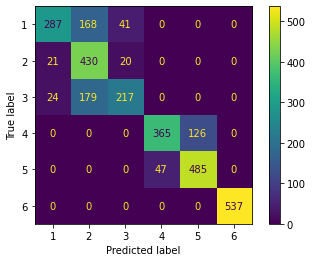

In [34]:
cm = confusion_matrix(y_valida, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [41]:
acuracia=clf.score(x_melhores_var,y_valida)
print(f'Acuracia do modelo é %.2f%%'% (acuracia*100))

Acuracia do modelo é 78.76%


- É possível verificar que o modelo ainda está errando muito ao classificar algumas atividades